In [208]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd

In [209]:
#importing the dataset
dataset = pd.read_csv("../../../dataset/Data.csv")

In [210]:
X = dataset.iloc[:,1:3].values  
Y = dataset.iloc[:,3].values

In [211]:
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values = np.nan,strategy ='mean')
Imputer = Imputer.fit(X)
X= Imputer.transform(X)

In [212]:
X

array([[4.40000000e+01, 7.20000000e+04],
       [2.70000000e+01, 4.80000000e+04],
       [3.00000000e+01, 5.40000000e+04],
       [3.80000000e+01, 6.10000000e+04],
       [4.00000000e+01, 6.37777778e+04],
       [3.50000000e+01, 5.80000000e+04],
       [3.87777778e+01, 5.20000000e+04],
       [4.80000000e+01, 7.90000000e+04],
       [5.00000000e+01, 8.30000000e+04],
       [3.70000000e+01, 6.70000000e+04]])

In [213]:
# # now encoding the data as dummy variables:
# from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
# LabelEncoder_X = LabelEncoder()
# X[:,0] = LabelEncoder_X.fit_transform(X[:,0])

# # as we need to distuingish each of them and give no other variable any kind of significance like
# # in the case of country variable
# from sklearn.compose import ColumnTransformer
# ct = ColumnTransformer([("Country", OneHotEncoder(), [0])], remainder = 'passthrough')
# X = ct.fit_transform(X)
# X

In [214]:
LabelEncoder_Y= LabelEncoder()
Y= LabelEncoder_Y.fit_transform(Y)
Y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [215]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
Y_train

array([0, 1, 1, 1, 0, 1, 0, 0, 1])

In [216]:
# TO standardscale particular column in a dataset 


# import pandas as pd
# data = pd.DataFrame({'Name' : [3, 4,6], 'Age' : [18, 92,98], 'Weight' : [68, 59,49]})

# col_names = ['Name', 'Age', 'Weight']
# features = data[col_names]

# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler

# ct = ColumnTransformer([
#         ('somename', StandardScaler(), ['Age', 'Weight'])
#     ], remainder='passthrough')

# ct.fit_transform(features)

In [217]:
# from sklearn.linear_model import LinearRegression
# regressor  = LinearRegression()
# regressor.fit(X_train,Y_train)

In [218]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, Y_train)  

LogisticRegression(random_state=0)

In [219]:
y_pred = classifier.predict(X_train) 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


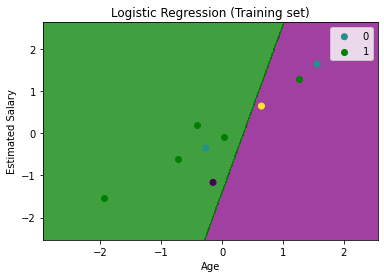

In [220]:
from matplotlib.colors import ListedColormap  
x_set, y_set = X_train, Y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('purple','green' ))) 

mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Logistic Regression (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

In [ ]:
from matplotlib.colors import ListedColormap  
x_set, y_set = X_train, y_pred  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('purple','green' ))) 

mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Logistic Regression (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  